### Import neccessary packages

In [1]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb
sb.set_theme(style="white", palette=None)
pd.set_option("display.max_columns", None) #Show all columns, or else some will just be "..."

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV

# model export
import pickle

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Read Files

In [2]:
train_df = pd.read_csv("./datasets/train.csv")
train_df_oversampled = pd.read_csv("./datasets/train_oversampled.csv")
train_df_smoten = pd.read_csv("./datasets/train_smoten.csv")
test_df = pd.read_csv("./datasets/test.csv")

Before we continue, we split the test data into X_test and y_test

In [3]:
X_test = pd.DataFrame(test_df.loc[:, test_df.columns!= "INSTALLS_GROUP"])
y_test = pd.DataFrame(test_df.loc[:, "INSTALLS_GROUP"])

### Model Training and Evaluation

**Function for model evaluation**

In [4]:
def evaluate_model(y_train,y_train_pred, y_test, y_test_pred):
    # Print the Classification Report
    precision_train ,recall_train ,fscore_train , _ = score(y_train,y_train_pred, average="binary")
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    stats_train = "Accuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 score={:0.2f}".format(
            accuracy_train, precision_train, recall_train, fscore_train)
    
    precision_test ,recall_test ,fscore_test , _ = score(y_test,y_test_pred, average="binary")
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    stats_test = "Accuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 score={:0.2f}".format(
            accuracy_test, precision_test, recall_test, fscore_test)
    # Plot the 2 by 2 Confusion Matrix
    f, axes = plt.subplots(1, 2, figsize=(18, 6))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
    axes[0].set_title("Train data", fontsize="large")
    axes[1].set_title("Test data", fontsize="large")
    axes[0].set_xlabel(stats_train, fontsize="large")
    axes[1].set_xlabel(stats_test, fontsize="large")
    
    return [[accuracy_train, precision_train, recall_train, fscore_train],
            [accuracy_test, precision_test, recall_test, fscore_test]]
    
# table for storing results
results = {}

Since our data are all categorical variables, we chose Decision Tree as our model.

Our predictors for `AD_SUPPORTED`, `CATEGORY`, `CONTENT_RATING`, `DAYS_SINCE_UPDATE_RANGE`, `FREE`, `IN_APP_PURCHASES`, `PRICEBAND`, `RATING_RATE`, `REVIEW_RATE`, `SIZEBAND`

**Creating a Model for INSTALLS_GROUP: Attempt 1 (Decision Tree (max-depth of 6) using Imbalanced data)**

In [5]:
# Extract train data
X_train = pd.DataFrame(train_df.loc[:, train_df.columns!= "INSTALLS_GROUP"])
y_train = pd.DataFrame(train_df.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_original = DecisionTreeClassifier(max_depth=6)
decision_tree_original.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

Check the accuracy of the model

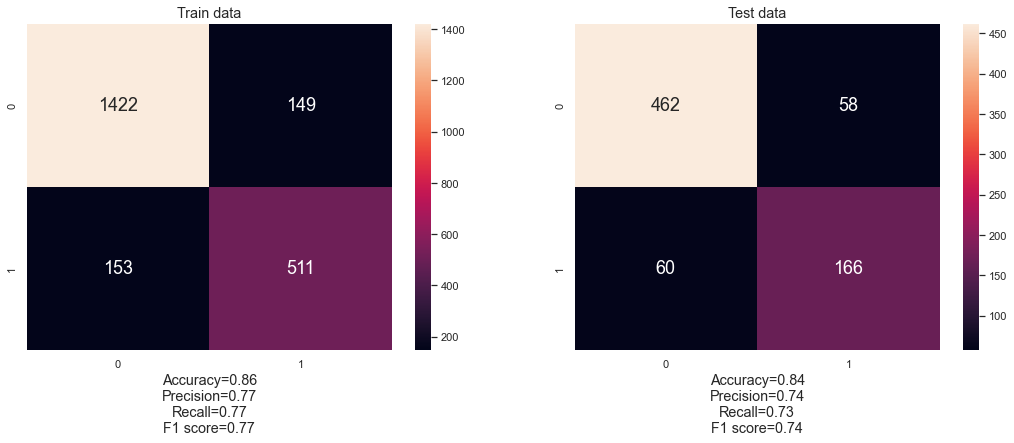

In [6]:
# Predict test data using the model created
y_train_pred = decision_tree_original.predict(X_train)
y_test_pred = decision_tree_original.predict(X_test)

result_1 = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
results["DT with Imbalanced"] = result_1

**Creating a Model for INSTALLS_GROUP: Attempt 2 (Decision Tree (max-depth of 6) using Oversampled (Randomly Sampled) data)**


In [7]:
# Extract train data
X_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, train_df_oversampled.columns!= "INSTALLS_GROUP"])
y_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_over = DecisionTreeClassifier(max_depth=6)
decision_tree_over.fit(X_train_oversampled, y_train_oversampled)

DecisionTreeClassifier(max_depth=6)

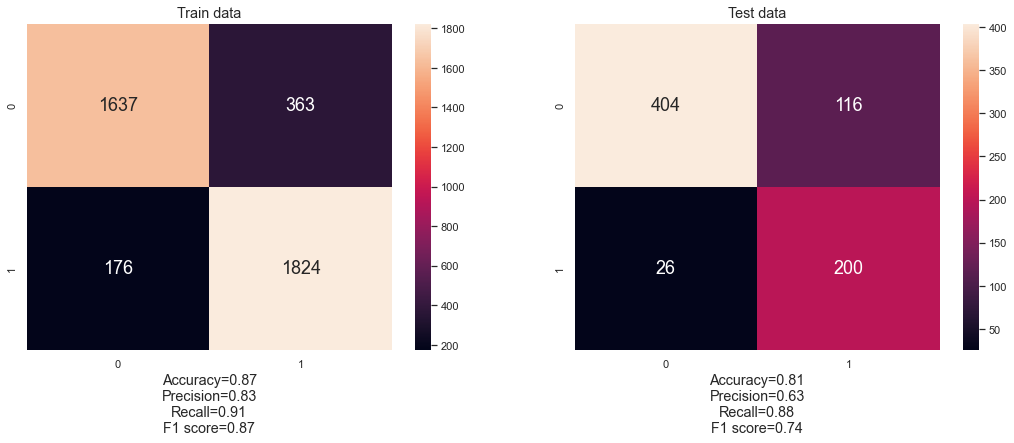

In [8]:
# Predict test data using the model created
y_train_oversampled_pred = decision_tree_over.predict(X_train_oversampled)
y_test_pred = decision_tree_over.predict(X_test)

result_2 = evaluate_model(y_train_oversampled, y_train_oversampled_pred, y_test, y_test_pred)
results["DT with Random Oversampling"] = result_2

**Creating a Model for INSTALLS_GROUP: Attempt 3 (Decision Tree (max-depth of 6) using Oversampled (SMOTEN) data)**

In [9]:
# Extract train data
X_train_smoten = pd.DataFrame(train_df_smoten.loc[:, train_df_smoten.columns!= "INSTALLS_GROUP"])
y_train_smoten = pd.DataFrame(train_df_smoten.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_smoten = DecisionTreeClassifier(max_depth=6)
decision_tree_smoten.fit(X_train_smoten, y_train_smoten)

DecisionTreeClassifier(max_depth=6)

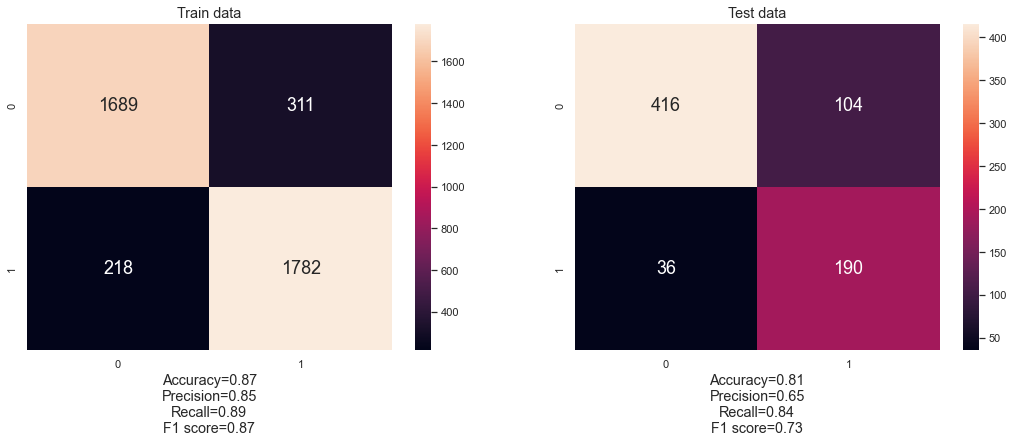

In [10]:
# Predict test data using the model created
y_train_smoten_pred = decision_tree_smoten.predict(X_train_smoten)
y_test_pred = decision_tree_smoten.predict(X_test)

result_3 = evaluate_model(y_train_smoten, y_train_smoten_pred, y_test, y_test_pred)
results["DT with SMOTEN Oversampling"] = result_3

Here we try to use more decision tress to predict `INSTALLS_GROUP`. It builds decision trees on different samples and takes their majority vote for classification.

**Creating a Model for INSTALLS_GROUP: Attempt 4 (Random forest (max-depth of 6, 200 trees) using Imbalanced data)**

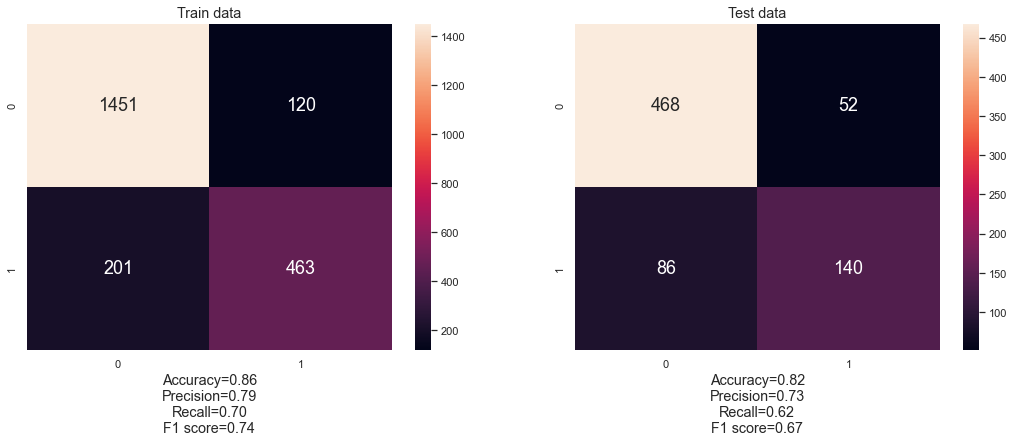

In [11]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=200)
random_forest.fit(X_train, y_train)

# Predict test data using the model created
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

result_4 = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
results["RF with Imbalanced"] = result_4

Note that the accuracy does not really increase a lot, we'll try to tune the hyperparameters to maximize accuracy of the classifier

**Creating a Model for INSTALLS_GROUP: Attempt 5 (Random forest with tuned hyperpameters using GridSeachCV for Imbalanced data)**

**Parameters for tuning**

Here we set the range for finding the optimal parameters. 

In [12]:
param_grid = { 
    'n_estimators': np.arange(200, 1100, 100),
    'max_features': ['auto', 'sqrt'],
    'max_depth' : np.arange(6, 13),
}

In [13]:
# Search for best parameters
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose =1 ,scoring='accuracy', n_jobs=4) # use 4 cores
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': array([ 6,  7,  8,  9, 10, 11, 12]),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy', verbose=1)

In [14]:
# Print out the best estimator
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=400)

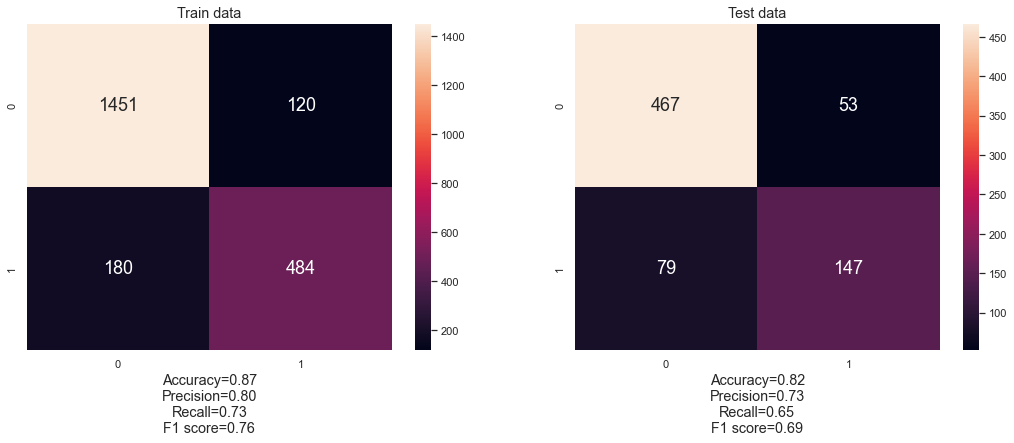

In [15]:
y_test_pred = CV_rfc.predict(X_test)
y_train_pred = CV_rfc.predict(X_train)

result_5 = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
results["RF with Imbalanced (Optimal)"] = result_5

**Creating a Model for INSTALLS_GROUP: Attempt 6 (Random forest with tuned hyperpameters using GridSeachCV for Oversampled (Randomly Sampled) data)**

In [16]:
CV_rfc_over = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 1, scoring='accuracy',  n_jobs=4)
CV_rfc_over.fit(X_train_oversampled, y_train_oversampled)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': array([ 6,  7,  8,  9, 10, 11, 12]),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy', verbose=1)

In [17]:
# Print out the best estimator
CV_rfc_over.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=200)

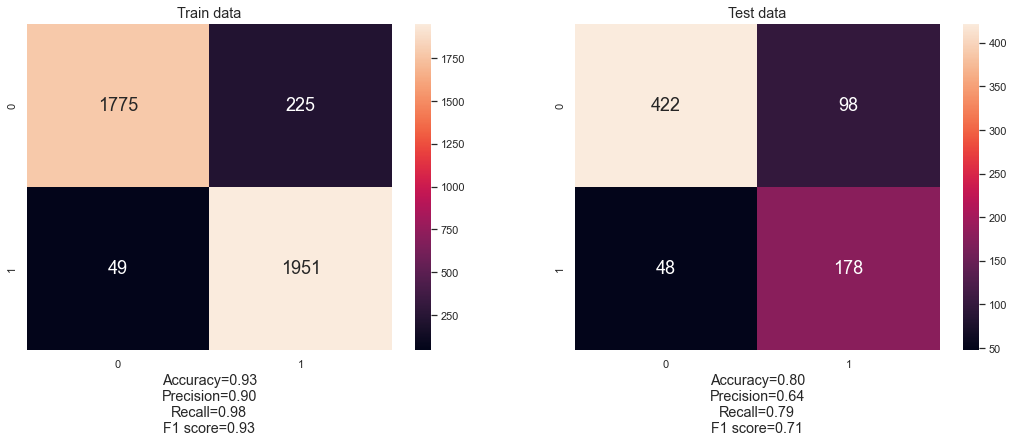

In [18]:
y_test_pred = CV_rfc_over.predict(X_test)
y_train_pred = CV_rfc_over.predict(X_train_oversampled)

result_6 = evaluate_model(y_train_oversampled, y_train_pred, y_test, y_test_pred)
results["RF with Random Oversampling (Optimal)"] = result_6

**Creating a Model for INSTALLS_GROUP: Attempt 7 (Random forest with tuned hyperpameters using GridSeachCV for Oversampled (SMOTEN) data)**

In [19]:
CV_rfc_smoten = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose =1 ,scoring='accuracy',  n_jobs=4)
CV_rfc_smoten.fit(X_train_smoten, y_train_smoten)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': array([ 6,  7,  8,  9, 10, 11, 12]),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy', verbose=1)

In [20]:
# Print out the best estimator
CV_rfc_smoten.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=500)

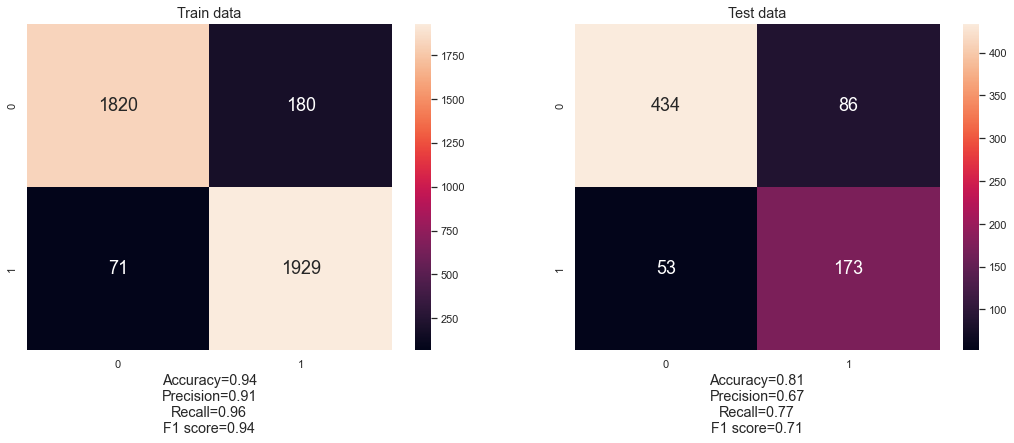

In [21]:
y_test_pred = CV_rfc_smoten.predict(X_test)
y_train_pred = CV_rfc_smoten.predict(X_train_smoten)

result_7 = evaluate_model(y_train_smoten, y_train_pred, y_test, y_test_pred)
results["RF with SMOTEN Oversampling (Optimal)"] = result_7

### Summary of model training and evaluation

**Function to plot bar charts for summarizing models**

In [22]:
def summarize_model(df_train, df_test ,scorer):
    f, axes = plt.subplots(2,1, figsize=(18, 15))
    title1 = f"{scorer} of all models on train data"
    title2 = f"{scorer} of all models on test data"
    axes[0].set_title(title1, fontsize="large")
    axes[1].set_title(title2, fontsize="large")
    sub_plot1 = sb.barplot(x = ['DT with Imbalanced','DT with Random \nOversampling', 
                            'DT with SMOTEN \nOversampling','RF with Imbalanced', 
                            'RF with \nImbalanced (Optimal)', 'RF with Random \nOversampling (Optimal)', 
                            'RF with SMOTEN \nOversampling (Optimal)'],
                        y = df_train.loc[scorer, :], ax=axes[0])
    sub_plot2 = sb.barplot(x = ['DT with Imbalanced','DT with Random \nOversampling', 
                            'DT with SMOTEN \nOversampling','RF with Imbalanced', 
                            'RF with \nImbalanced (Optimal)', 'RF with Random \nOversampling (Optimal)', 
                            'RF with SMOTEN \nOversampling (Optimal)'],
                        y = df_test.loc[scorer, :], ax=axes[1])
    for p in sub_plot1.patches:
            if p.get_height() == 0:
                sub_plot1.annotate(format(p.get_height(), '.2f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')
            else:
                sub_plot1.annotate(format(p.get_height(), '.2f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, -12), 
                            textcoords = 'offset points')
                
    for p in sub_plot2.patches:
            if p.get_height() == 0:
                sub_plot1.annotate(format(p.get_height(), '.2f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')
            else:
                sub_plot2.annotate(format(p.get_height(), '.2f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, -12), 
                            textcoords = 'offset points')
    axes[0].set_ylabel(scorer, fontsize=12)
    axes[1].set_ylabel(scorer, fontsize=12)
    plt.show()

In [23]:
test_results_train = {'DT with Imbalanced': result_1[0],
                'DT with Random Oversampling': result_2[0],
                'DT with SMOTEN Oversampling': result_3[0],
                'RF with Imbalanced': result_4[0],
                'RF with Imbalanced (Optimal)': result_5[0],
                'RF with Random Oversampling (Optimal)': result_6[0],
                'RF with SMOTEN Oversampling (Optimal)': result_7[0],
                }

test_results_test = {'DT with Imbalanced': result_1[1],
                'DT with Random Oversampling': result_2[1],
                'DT with SMOTEN Oversampling': result_3[1],
                'RF with Imbalanced': result_4[1],
                'RF with Imbalanced (Optimal)': result_5[1],
                'RF with Random Oversampling (Optimal)': result_6[1],
                'RF with SMOTEN Oversampling (Optimal)': result_7[1],
                }

model_summary_train = pd.DataFrame(test_results_train, index=["Accuracy", "Precision", "Recall", "F1 score"])
model_summary_test = pd.DataFrame(test_results_test, index=["Accuracy", "Precision", "Recall", "F1 score"])

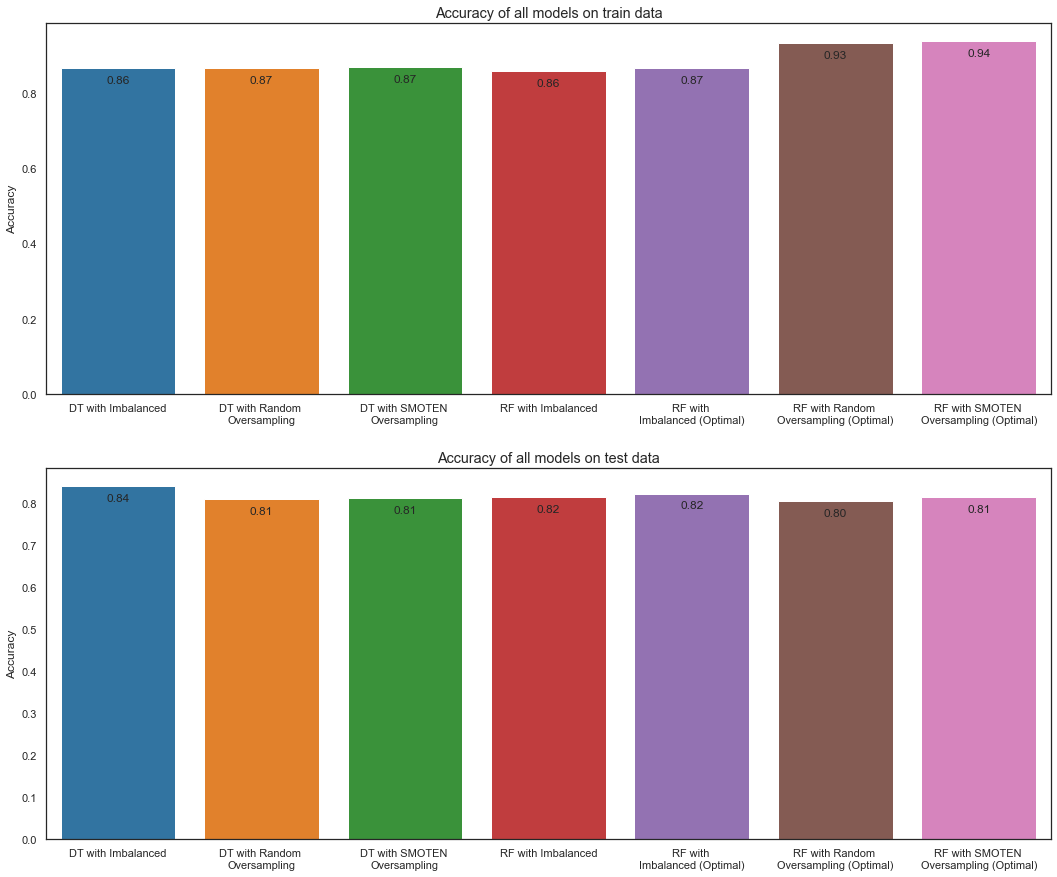

In [24]:
summarize_model(model_summary_train, model_summary_test,"Accuracy")

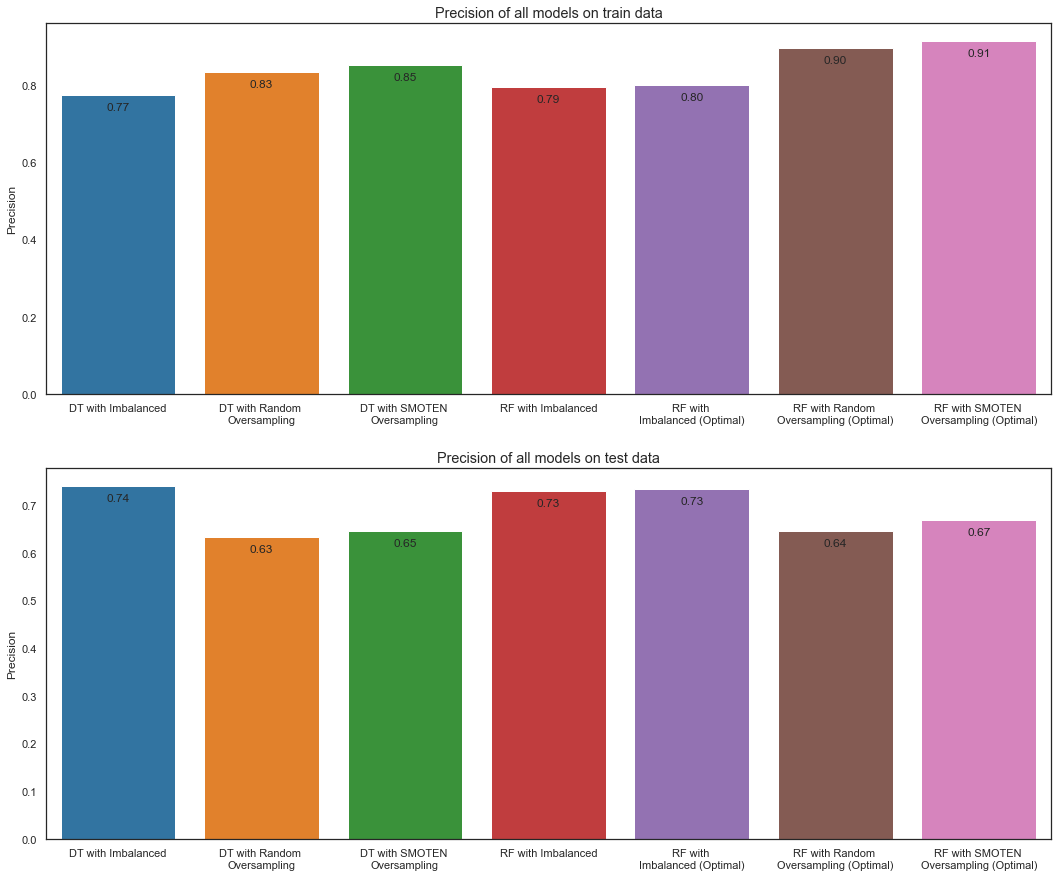

In [25]:
summarize_model(model_summary_train, model_summary_test,"Precision")

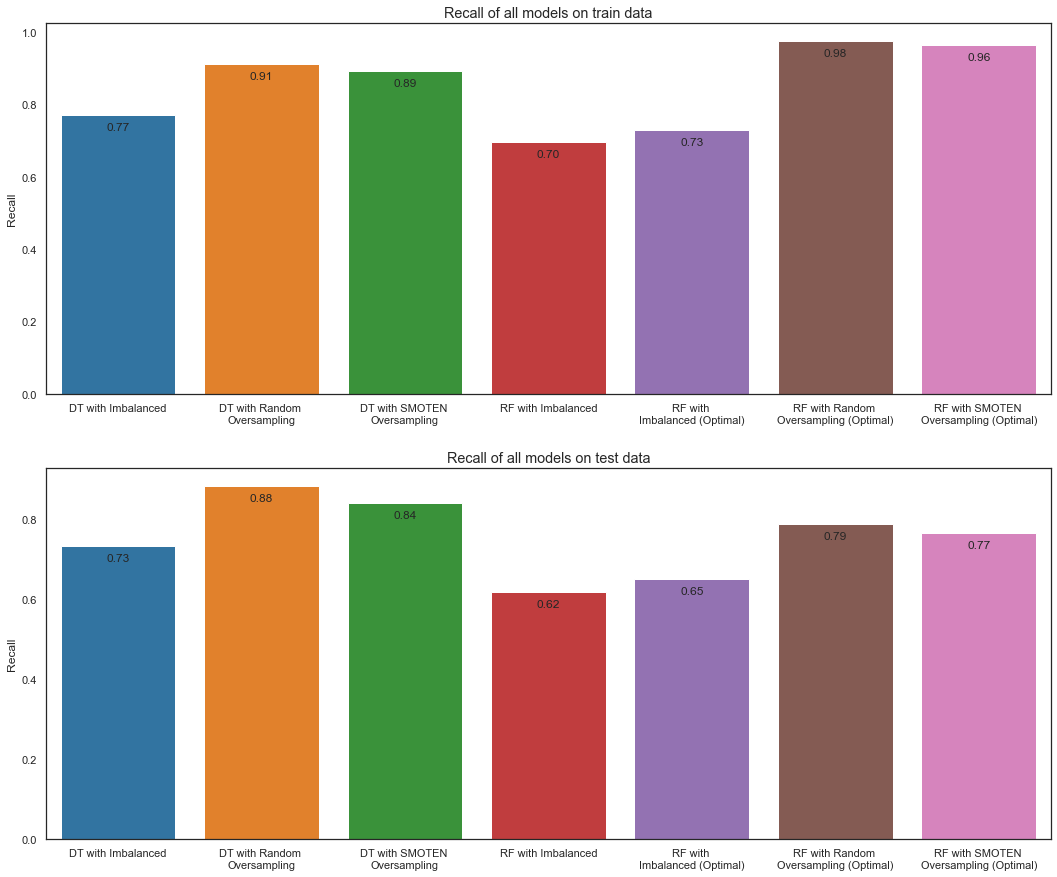

In [26]:
summarize_model(model_summary_train, model_summary_test,"Recall")

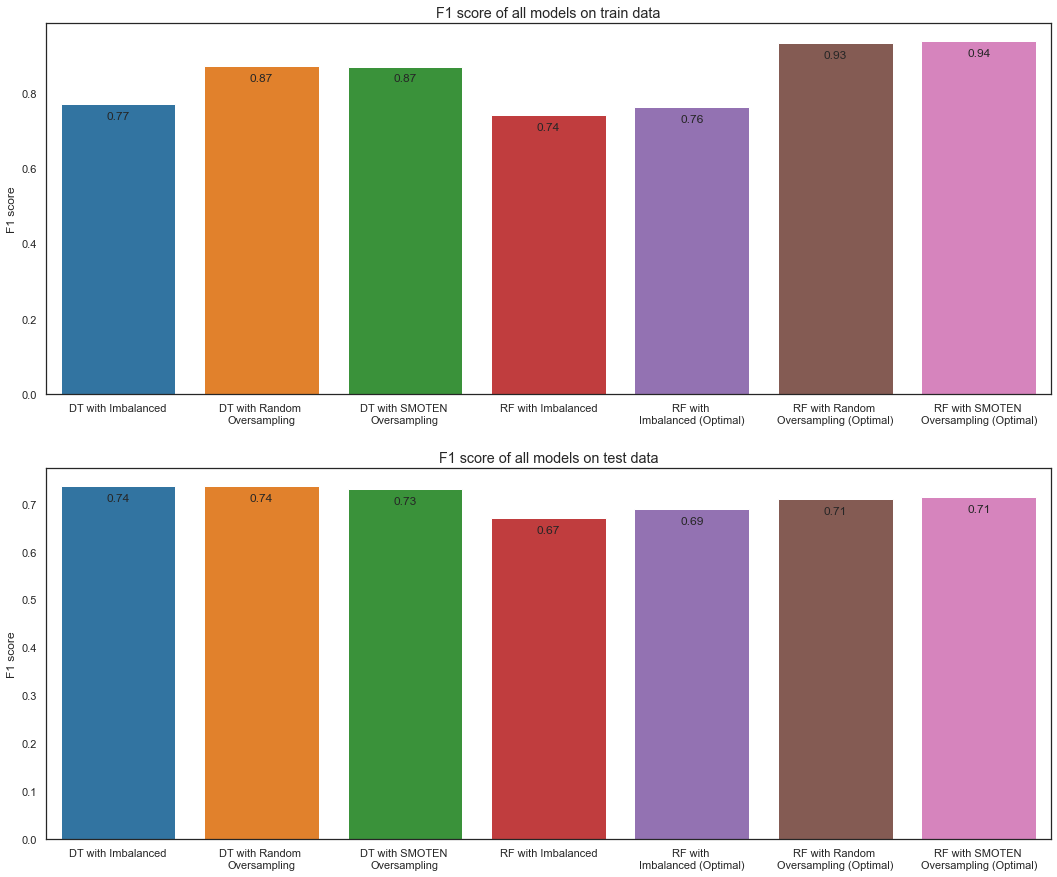

In [27]:
summarize_model(model_summary_train, model_summary_test,"F1 score")

From the above charts, we have made two conclusions.<br>

The first one is oversampling does increase the scores of the train set, but it could also have different effects on the score of the test set. Specifically, oversampling causes a decrease in the accuracy and precision of the test set, but increases the score of recall and F1-score. For accuracy and precision, we think that the test score dropped because oversampling causes an increase weight in some training sample which leads to increase bias. Eventually, overfitting occurs causing the model to have a decrease in performance.<br>

Next, based on the first conclusion made, we think that we should consider the models without oversampling. Based on the performance of the test set, it seems that the score of the random forest model with gridsearcCV is lower than that of the decision tree model. we think that this might be another case of overfitting. This is because in Random Forest, many decision trees are built on different samples to produce a output. Therefore, when too many decision trees are built, it may also lead to overfitting.

Before making the conclusion of choosing the most suitable model, we would like to emphasise our few considerations on the scores. Our main focus is on accuracy and precision. Accuracy is important because it measures the overall performance of the model, which is a crucial indicator of the performance of the model. Next, we chose precision over recall because precision is a reflect of false positive rate, that is a higher precision indicates a lower false positive rate while recall is a reflect of false negative rate, that is a higher recall means a lower false negative rate. In this case of predicting if an app would exceed 1 million installs in one year, we would want to lower the false positive rate, so that we do not predict that the app will exceed a millions installs even when it could not. This is to ensure that the app developer does not suffer from great loss when their app did not actually managed to reach a million installs.

In conclusion,we think that the Decision Tree model with max depth of 6, without sampling is the most suitable. This is because the performance of the test set in accuracy and precision is higher than the others. Besides that, because the data we used to train this model is not oversampled, we have reduced the risk of overfitting to occur.


### Export Model for Deployment

In [28]:
# pick the best model
best_model = decision_tree_original

#export to pickle
file_path = "./streamlit-app/model/model.pkl"
pickle.dump(best_model, open(file_path, 'wb'))

### References

- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9